<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-5"><span class="toc-item-num">5&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<div class="alert alert-info">
Привет! Меня зовут Никита Мишин и я буду твоим ревьюером по этому проекты.
Для простоты предлагаю общение на 'ты'. Буду предполагать, что ты не против:) 
Если более предпочтительно обращение на 'Вы', пиши, не стесняйся.
Также если будут возникать вопросы, аналогично, пиши:)

Предлагаю работать в известном тебе итеративном формате.
Итерация состоит в моей проверке твоего решения. 
После решения могут остаться какие-то недочеты, которые я попрошу тебя устранить, ты их исправляешь и я проверяю твои решения.
Оставленные мною комментарии могут быть разного вида:

- зеленый: элегантные решения, которые тебе стоит запомнит и в дальнейшем взять на вооружение:) 

- желтый: сигнал о том, что есть некритичная вещь(не всегда ошибка), что нужно точно поправить в следующей работе, даже желательно в этой (полезно, в первую очередь, для тебя:) ).Также это рекомендации на будущее    

- красный: недочет, который нужно исправить в этой работе, для того, чтобы она была принята

- синий: полезная информация, доп ресурсы, "вопросы на подумать"

Также попрошу не удалять мои комментарии:) <a class="tocSkip">
</div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Для начала, импортируем все необходимые библиотеки:

In [1]:
!pip install -U imblearn 
!pip install -U scikit-learn
!pip install -U sklearn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: imblearn in /home/jovyan/.local/lib/python3.7/site-packages (0.0)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (0.24.2)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: sklearn in /home/jovyan/.local/lib/python3.7/site-packages (0.0)


In [2]:
# import sklearn.neighbors._base
# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

Создадим переменную data и укажем полный путь к файлу для облегчения проверки. Посмотрим общую информацию и несколько строк.

In [4]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
data.info()
data.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
241,242,15651001,Tsao,725,Germany,Female,39,5.0,116803.8,1,1,0,124052.97,0
9279,9280,15573854,Chukwujekwu,727,France,Male,62,5.0,0.0,2,0,1,38652.96,0


<div class="alert alert-info">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
Полезно еще использовать метод sample с зафиксированным random_state--- будет выдавать случайные элементы выборки
</div>

<div class="alert alert-info">
    <h1> Комментарий студента <a class="tocSkip"></h1>
    Поправил. Ну, если что, sample делал в предыдущем проекте. Извини, кстати, что тоже синим - обычно в шапке ревьюеры пишут, каким цветом надо оставлять для них свои комментарии.
</div>

<div class="alert alert-warning">
<h1> Комментарий ревьюера v2 <a class="tocSkip"></h1>
В методе sample, по-хорошему, всегда стоит фиксировать random_state, чтобы была воспроизводимость</div>

<div class="alert alert-info">
<h1> Комментарий ревьюера v2 <a class="tocSkip"></h1>
Мой косяк, забываю людям все время написать, как лучше отправлять. Посыпаю пеплом голову...
</div>

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Согласно описания проекта, RowNumber — индекс строки в данных. Он нам абсолютно не нужен. Аналогичная ситуация с Surname. А если можно удалить лишнее - нужно удалять!

<div class="alert alert-success">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
Верно! Идентификаторы бесполезны для моделей
</div>

In [6]:
data = data.drop(columns=['RowNumber', 'Surname'])

Также, у нас есть CustomerId. Думаю, хорошей идеей было бы объявить его для удобства индексом.

In [7]:
data = data.set_index('CustomerId')
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0


Все строки, исходя информации выше, заполнены, кроме Tenure. Tenure — сколько лет человек является клиентом банка. Мы это не можем так оставить.

In [8]:
data.loc[data['Tenure'].isna(), 'Tenure'] = data['Tenure'].median()
data.isna().sum().sum()

0

<div class="alert alert-warning">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
Прежде чем что-то заполнять, лучше изучить распределение признака. Это у тебя сделано уже после</div>

In [9]:
data['Tenure'].value_counts()

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64

Что осталось нам сделать в этом разделе, собственно, это предварительно (до нормализации) разделить данные на признаки X и целевую переменную y. Соответственно, Exited — факт ухода клиента - целевой признак.

In [10]:
X = data.drop(columns=['Exited'])
y = data['Exited']

Доля объектов положительного класса:

In [11]:
sum(data["Exited"]/len(data))

0.20369999999999389

Доля объектов отрицательного класса:

In [12]:
1-sum(data["Exited"]/len(data))

0.7963000000000061

Объектов отрицательного класса намного больше.

<div class="alert alert-success">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
Да, налицо явный дисбаланс классов</div>

<div class="alert alert-info">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
В качестве иссследовательского анализа данных круто было бы изучить распределение признаков+ посмотреть на матрицу корреляций</div>

## Исследование задачи

Для начала, выделим категориальные и количественные признаки. Для категориальных признаков применим OHE.

In [13]:
#gender_one_hot = pd.get_dummies(data["Gender"], drop_first=True)
#country_one_hot = pd.get_dummies(data["Geography"], drop_first=True)
#data.drop(["Gender", "Geography"], axis=1, inplace=True)
#df_one_hot = pd.concat([data, gender_one_hot, country_one_hot], axis=1)
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,,
15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
data.shape

(10000, 12)

In [15]:
features = data.drop('Exited', axis=1)
target = data['Exited']

In [16]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,
15634602,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
15619304,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


In [17]:
target.head()

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
Name: Exited, dtype: int64

<div class="alert alert-info">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
Можно было сразу data = pd.get_dummies(data,drop_first=True)
</div>

Применим MinMaxScaler для нормализации.

In [18]:
#scaler = MinMaxScaler()
#df_one_hot_scaled = df_one_hot.copy(deep=True)
#df_one_hot_scaled[["Balance", "EstimatedSalary"]] = scaler.fit_transform(df_one_hot_scaled[["Balance", "EstimatedSalary"]])

<div class="alert alert-danger">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
А можем ли мы скейлер обучать на всей выборке? Мы же доступа к тестовым данным не имеем на стадии обучения.

Надо было обучить скейлер на обучающей выборке
</div>

<div class="alert alert-info">
    <h1> Комментарий студента <a class="tocSkip"></h1>
    Ок, ценное замечание. См. ниже решение.</div>

<div class="alert alert-info">
<h1> Комментарий ревьюера v2 <a class="tocSkip"></h1>
Угу, круто что осознал
</div>

А вот теперь разделим как надо:

In [19]:
#features = df_one_hot_scaled.drop("Exited", axis=1)
#target = data["Exited"]
#features = X
#target = y

Разобьём данные на обучающую, валидационную и тестовую выборки.

In [20]:
features_train, features_test0, target_train, target_test0 = train_test_split(features, target, 
                                                                              test_size=0.2, 
                                                                              random_state=1)

In [21]:
features_valid, features_test, target_valid, target_test = train_test_split(features_test0, target_test0, 
                                                                              test_size=0.5, 
                                                                              random_state=1)

In [22]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,
15721585,628,29,3.0,113146.98,2,0,1,124749.08,1,0,1
15617790,626,29,5.0,105767.28,2,0,0,41104.82,0,0,0
15775905,612,47,5.0,130024.87,1,1,1,45750.21,1,0,0
15616666,646,52,6.0,111739.40,2,0,1,68367.18,1,0,0
15664720,714,33,8.0,122017.19,1,0,0,162515.17,0,1,1


In [23]:
#features_train = pd.DataFrame(features_train)
#features_valid = pd.DataFrame(features_valid)
#target_train = pd.Series(target_train)
#target_valid = pd.Series(target_valid)

Полученные выборки:
Обучающая
features_train
target_train

Валидационная
features_valid
target_valid

Тестовая
features_test
target_test

Для масштабирования зафиксируем численные признаки:

In [24]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [25]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

Масштабируем численные признаки обучающей выборки:

In [26]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,
15721585,-0.230820,-0.944500,-0.727387,0.588173,0.802257,0,1,0.427394,1,0,1
15617790,-0.251509,-0.944500,-0.001814,0.469849,0.802257,0,0,-1.025487,0,0,0
15775905,-0.396330,0.774987,-0.001814,0.858788,-0.911510,1,1,-0.944798,1,0,0
15616666,-0.044622,1.252622,0.360973,0.565604,0.802257,0,1,-0.551946,1,0,0
15664720,0.658795,-0.562392,1.086545,0.730395,-0.911510,0,0,1.083383,0,1,1


Масштабируем численные признаки валидационной выборки:

In [27]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,
15731026,0.338120,0.010771,-1.090173,0.378375,0.802257,1,0,0.157335,1,0,0
15792565,0.979471,0.679460,0.723759,-1.225992,0.802257,1,1,-0.562320,0,0,0
15710316,-2.030741,0.870514,-0.001814,1.096294,-0.911510,1,1,-0.121444,0,1,0
15781347,-0.520463,0.201825,-1.452960,-1.225992,0.802257,1,1,-0.155456,0,0,0
15694859,1.041537,-1.040027,1.812118,0.905402,0.802257,1,1,-0.929508,1,0,0


Масштабируем численные признаки тестовой выборки:

In [28]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,
15641732,-1.110092,-0.275810,-0.001814,-1.225992,0.802257,0,0,-1.287514,0,0,0
15660571,0.182954,0.392879,-0.001814,0.586366,-0.911510,1,1,0.004871,0,1,1
15665064,-1.316979,-0.275810,1.086545,1.312961,0.802257,1,0,0.958136,0,0,1
15711834,-0.003244,-0.848973,0.360973,-1.225992,-0.911510,0,0,-0.558374,0,1,0
15700656,0.120888,-0.657919,1.449332,-1.225992,0.802257,0,0,-0.608881,0,0,1


Дисбаланс мы выявили ещё в первом разделе, но теперь есть возможность посмотреть на него с учётом разбивки на выборки.

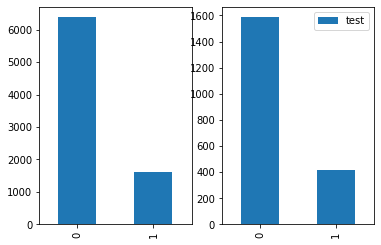

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2)
target_train.value_counts().plot(kind='bar', ax=ax1, label='train')
target_test0.value_counts().plot(kind='bar', ax=ax2, label='test')
plt.legend()

### Обучение моделей

<b>Логистическая регрессия:</b>

In [30]:
lr = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=10000)
lr.fit(features_train, target_train)
predictions = lr.predict(features_valid)
print("Accuracy:", accuracy_score(predictions, target_valid))
print("F1:", f1_score(predictions, target_valid))

Accuracy: 0.734
F1: 0.4962121212121212


<b>Случайный лес:</b>

In [31]:
rfc = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10, 20, 30, 40, 50],
    'max_features': ['log2'],
    'max_depth' : [5,7,9,11,13,15],
    'criterion' : ['gini']
}

In [32]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'max_features': ['log2'],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [33]:
predictions = CV_rfc.best_estimator_.predict(features_valid)
print("Accuracy:", accuracy_score(predictions, target_valid))
print("F1:", f1_score(predictions, target_valid))

Accuracy: 0.893
F1: 0.627177700348432


<div class="alert alert-info">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
Результат внушает оптимизм!
</div>

## Борьба с дисбалансом

Для борьбы с дисбалансом будем использовать Upsampling и Downsampling. Нам надо увеличить число наблюдений положительного класса. Создадим функцию <b>upsample</b>.

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [35]:
features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, repeat=4)

In [36]:
from imblearn.pipeline import Pipeline, make_pipeline

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                             RandomForestClassifier(n_estimators=100, random_state=13))

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=2, scoring='f1',
                        return_train_score=True)
grid_imba.fit(features_train, target_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='f1')

In [37]:
predictions = grid_imba.best_estimator_.predict(features_valid)
print("Accuracy:", accuracy_score(predictions, target_valid))
print("F1:", f1_score(predictions, target_valid))

Accuracy: 0.834
F1: 0.5786802030456852


In [38]:

CV_rfc = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring='recall',return_train_score=True)
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

<div class="alert alert-danger">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
Смотри, здесь есть небольшая специфика при проведении кросс-валидации. То как ты делаешь --- у нас кросс-валидации внутри гридсерча будет на сбалансированной выборке, что отличается от теста.

Тут нужно, например, применять пайплайн. <a href='https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html'>Чтиво</a>
</div>

<div class="alert alert-info">
    <h1> Комментарий студента <a class="tocSkip"></h1>
    Я прочитал решение с pipeline, отредактировал код, но к сожалению, редактор не даёт импортировать SMOTE - выдаёт ошибку. А сам код с imba_pipeline я пока закомментировал.</div>

<div class="alert alert-info">
<h1> Комментарий ревьюера v2 <a class="tocSkip"></h1>
Хм, мне кажется, где-то я такое встречал уже. Что-то с разнице библиотекю Сейчас
</div>

<div class="alert alert-danger">
<h1> Комментарий ревьюера v2 <a class="tocSkip"></h1>
1) PIpeline нужен из имбаланса

2) По иморту -- надо было последней версии установить <a href='https://stackoverflow.com/questions/60145652/no-module-named-sklearn-neighbors-base'>библиотеки</a>. В начале проекта добали строчки с пипом.
    
У меня вроде даже все отработало. Разобрался?)
</div>

<div class="alert alert-info">
    <h1> Комментарий студента <a class="tocSkip"></h1>
    У меня отработал импорт, а с ошибкой "Invalid parameter criterion for estimator Pipeline" я так и не разобрался. То есть понятно, где, непонятно, почему так. Перепробовал всё. Не знаю, как у тебя, у меня минут пять каждый раз проект собирается. Можно кофе попить. Скоринг я включил. P.S. Может ещё вот решение, но я тоже не докурил: https://stackoverflow.com/questions/58825053/smote-function-not-working-in-make-pipeline</div>

<div class="alert alert-info">
<h1> Комментарий ревьюера v3 <a class="tocSkip"></h1>
Как раз оно использовано выше, где я импортнул Pipeline и make_pipeline
    
А ошибка к тому, что надо хитрокриво задавать сетку параметров:  <a href='https://stackoverflow.com/questions/58815016/cross-validating-with-imblearn-pipeline-and-gridsearchcv'> чтиво</a>
    
    params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

    imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                             RandomForestClassifier(n_estimators=100, random_state=13))


    new_params = {'randomforestclassifier__' + key: params[key] for key in params}

    grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=2, scoring='f1',
                        return_train_score=True)

    grid_imba.fit(features_train, target_train)
    
    
Так все отрабатывает. Вообще можно на обычных пайплайнах сделать sklearных --- свой класс создаем, который на fit ребалансировку делает
</div>

<div class="alert alert-warning">
<h1> Комментарий ревьюера v2 <a class="tocSkip"></h1>
Кстати, в гридсерч надо бы посылать scoring. Ведь мы под конкретную метрику оптимизируем
</div>

<div class="alert alert-info">
    <h1> Комментарий студента <a class="tocSkip"></h1>
    Нет. Отмучился сутки, никак не работает. Хотя в теории должен. То есть суть понял, что надо преобразовать к виду с двумя аргументами, разделёнными "__", но никак. Да вроде и строчка "new_params = {'randomforestclassifier__' + key: params[key] for key in params}" берёт эти параметры и добавляет. Но всё равно ошибка. Я даже не понимаю, это уже рабочий пример ты прислал (у меня не работает), или его надо привести к чему-то? Я приводил, всё равно ошибка.</div>

<div class="alert alert-danger">
<h1> Комментарий ревьюера v3 <a class="tocSkip"></h1>
 param_grid=new_params  --- ты это забыл поправить))) У тебя было param_grid=param_grid
</div>

<div class="alert alert-info">
    <h1> Комментарий студента <a class="tocSkip"></h1>
    Да. Получилось. Это из-за того, что в случайном лесе я так выпендрился.</div>

<div class="alert alert-info">
<h1> Комментарий ревьюера v4 <a class="tocSkip"></h1>
Круто, что разобрался! Удачи в следующих проектах!
</div>

In [39]:
predictions = CV_rfc.best_estimator_.predict(features_valid)
print("Accuracy:", accuracy_score(predictions, target_valid))
print("F1:", f1_score(predictions, target_valid))

Accuracy: 0.805
F1: 0.5751633986928104


Далее можно посмотреть на графике, не сломали ли мы распределение признаков на примере CreditScore (дисклеймер: не сломали, всё в порядке).

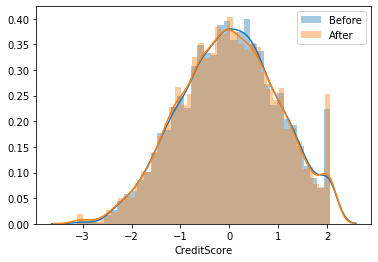

In [40]:
sns.distplot(features_train['CreditScore'], label="Before")
sns.distplot(features_upsampled_train['CreditScore'], label='After')
plt.legend()

Применяем <b>Downsampling</b>, создав функцию:

In [41]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [42]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, fraction=0.5)

In [43]:
CV_rfc = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring='recall')
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(features_downsampled_train, target_downsampled_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             scoring='recall')

In [44]:
predictions = CV_rfc.best_estimator_.predict(features_valid)
print("Accuracy:", accuracy_score(predictions, target_valid))
print("F1:", f1_score(predictions, target_valid))

Accuracy: 0.799
F1: 0.5750528541226216


Аналогично с downsampling: всё в порядке.

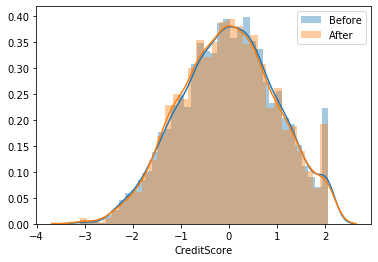

In [45]:
sns.distplot(features_train['CreditScore'], label="Before")
sns.distplot(features_downsampled_train['CreditScore'], label='After')
plt.legend()

<div class="alert alert-info">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
Аналогично
</div>

## Тестирование модели

In [46]:
predictions = CV_rfc.best_estimator_.predict(features_test)
print("Accuracy:", accuracy_score(predictions, target_test))
print("F1:", f1_score(predictions, target_test))

Accuracy: 0.8
F1: 0.6296296296296297


<div class="alert alert-success">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
Бейзлайн успешно побит, поздравляю!</div>

# Вывод

1. Нами был проведён анализ полученных данных, с отсутствующими данными, которые нам удалось восстановить и выявить явный дисбаланс классов,
2. Наилучшая модель до борьбы с дисбалансом оказалась модель случайного леса,
3. Мы провели upsampling и downsampling положительного класса, благодаря чему удалось повысить f1 меру,
4. Проверка на тестовой выборке подтвердила, что downsampling действительно помог справиться с дисбалансом классов и удалось увеличить метрику f1 до 63%.

<div class="alert alert-info">
<h1> Комментарий ревьюера <a class="tocSkip"></h1>
Круто было бы иметь сводную табличку с результатами)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Спасибо за хороший проект: 

- Видно, что приложены усилия

- Код написан хорошо 

- Соблюдена структура проекта 
   
- нужно немного доработать проект:
    
    - кросс-валидация
    
    - скейлер
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*